In [3]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import decoupler as dc

In [4]:
adata = sc.read_h5ad('../../results/06_endo/01_clustering/endothelial.h5ad')

In [5]:
# Pathway activity inference 

# - Androgen: involved in the growth and development of the male reproductive organs.
# - EGFR: regulates growth, survival, migration, apoptosis, proliferation, and differentiation in mammalian cells
# - Estrogen: promotes the growth and development of the female reproductive organs.
# - Hypoxia: promotes angiogenesis and metabolic reprogramming when O2 levels are low.
# - JAK-STAT: involved in immunity, cell division, cell death, and tumor formation.
# - MAPK: integrates external signals and promotes cell growth and proliferation.
# - NFkB: regulates immune response, cytokine production and cell survival.
# - p53: regulates cell cycle, apoptosis, DNA repair and tumor suppression.
# - PI3K: promotes growth and proliferation.
# - TGFb: involved in development, homeostasis, and repair of most tissues.
# - TNFa: mediates haematopoiesis, immune surveillance, tumour regression and protection from infection.
# - Trail: induces apoptosis.
# - VEGF: mediates angiogenesis, vascular permeability, and cell migration.
# - WNT: regulates organ morphogenesis during development and tissue repair.


progeny = dc.get_progeny(organism='human', top=500)

dc.run_mlm(
    mat=adata,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

59 features of mat are empty, they will be removed.
Running mlm on mat with 4655 samples and 15216 targets for 14 sources.


100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


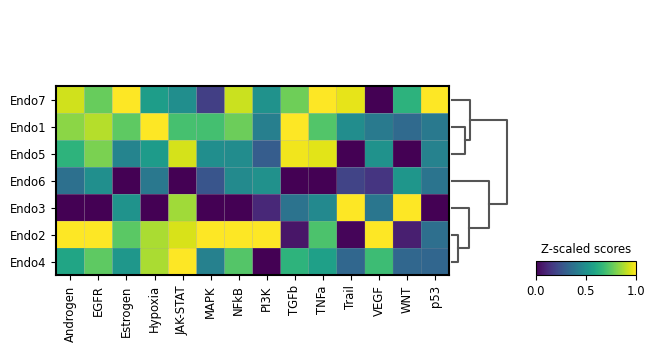

In [8]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')

sc.pl.matrixplot(acts, var_names=acts.var_names, 
                 groupby='sub_clusters', 
                 dendrogram=True, 
                 standard_scale='var', 
                 colorbar_title='Z-scaled scores')